In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
color_map = {
    "ARM-CMSIS-DSP": "blue",
    "CMSIS-DSP": "blue",
    "TillJIT": "orange",
    "tIlljIt": "orange",
    "JIT": "orange",
    "ReferenceCM": "green",
    "Peak": "red",
    "Intrinsics": "purple"
}

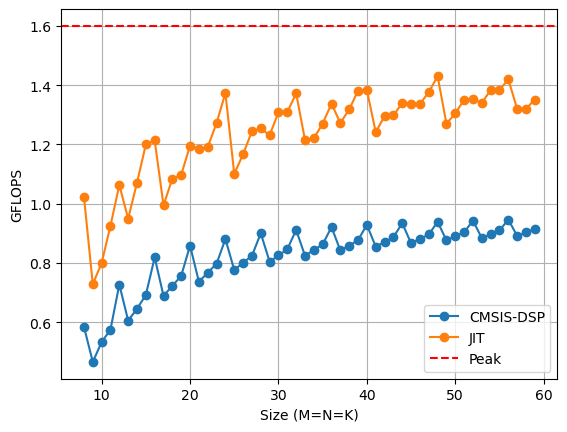

In [4]:
data = pd.read_csv('gemm_square_test1.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['K'], subset['GFLOPS'], label=type_exec, marker='o')

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N=K)')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Filter data for JIT and CMSIS-DSP
jit_data = data[data['Type'] == 'JIT']
cmsis_data = data[data['Type'] == 'CMSIS-DSP']

# Ensure both subsets are aligned by index
aligned_data = pd.merge(jit_data, cmsis_data, on=['M', 'K', 'N'], suffixes=('_jit', '_cmsis'))

# Calculate speedup
aligned_data['Speedup'] = aligned_data['GFLOPS_jit'] / aligned_data['GFLOPS_cmsis']

# Calculate average speedup
average_speedup = aligned_data['Speedup'].mean()
print(f"Average Speedup of JIT over CMSIS-DSP: {average_speedup}")

Average Speedup of JIT over CMSIS-DSP: 1.511849114815639


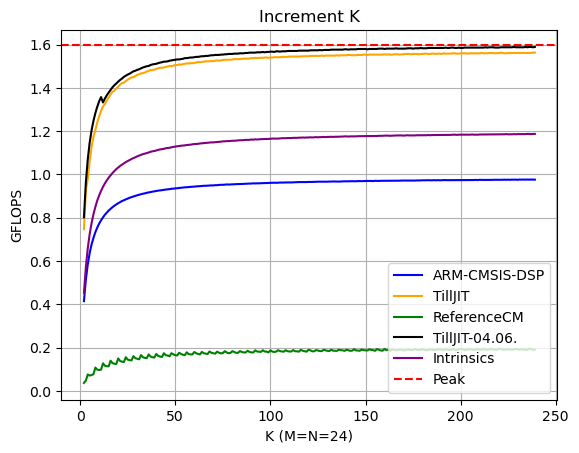

In [14]:
data = pd.read_csv('gemm_growing_k.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['K'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black').lower())

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('K (M=N=24)')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.title("Increment K")
plt.show()

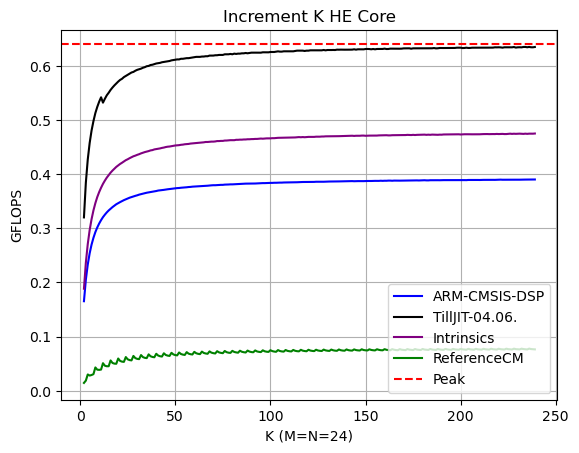

In [34]:
data = pd.read_csv('gemm_growing_k_he.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['K'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black').lower())

plt.axhline(y=0.64, color='r', linestyle='--', label='Peak')
plt.xlabel('K (M=N=24)')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.title("Increment K HE Core")
plt.show()

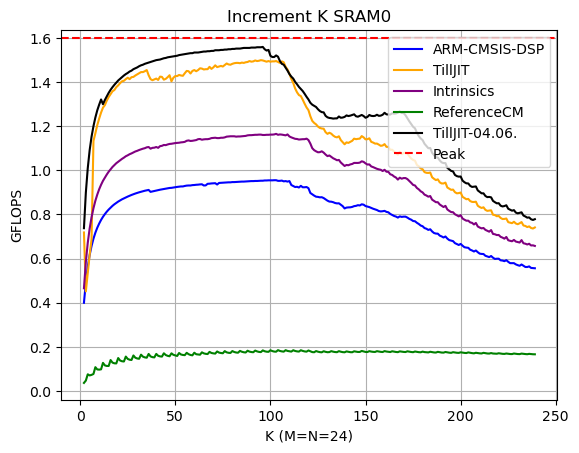

In [15]:
data = pd.read_csv('gemm_growing_k_sram0.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['K'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('K (M=N=24)')
plt.ylabel('GFLOPS')
plt.legend()
plt.grid(True)
plt.title("Increment K SRAM0")
plt.show()

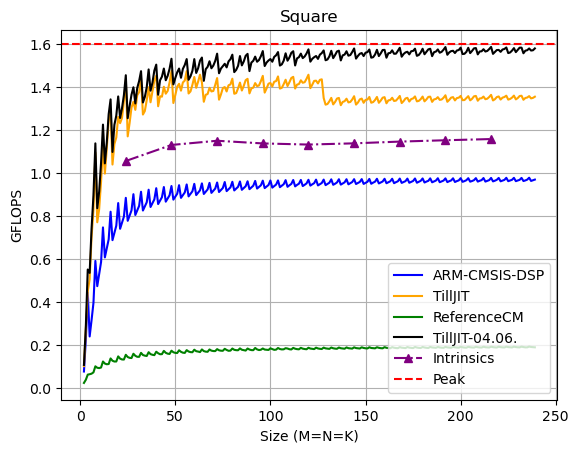

In [16]:
data = pd.read_csv('gemm_square_all.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    if type_exec == "Intrinsics":
        plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black').lower(), linestyle='-.', marker='^')
    else:
        plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black').lower())

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N=K)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Square")
plt.show()

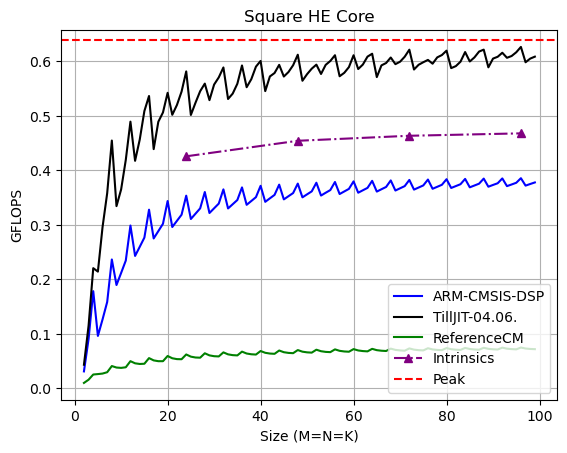

In [29]:
data = pd.read_csv('gemm_square_he.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    if type_exec == "Intrinsics":
        plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black').lower(), linestyle='-.', marker='^')
    else:
        plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black').lower())

plt.axhline(y=0.64, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N=K)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Square HE Core")
plt.show()

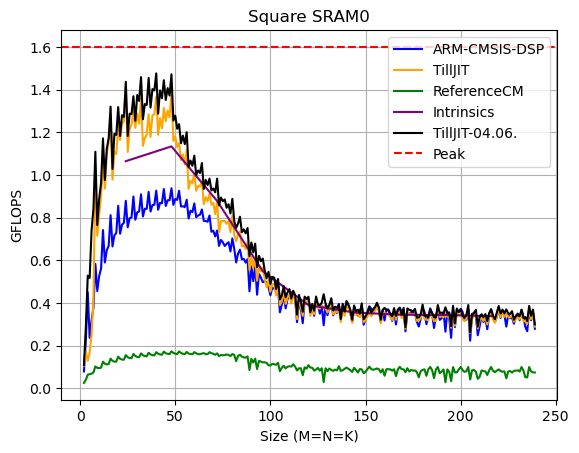

In [18]:
data = pd.read_csv('gemm_square_sram0.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('Size (M=N=K)')
plt.ylabel('GFLOPS')
plt.legend(loc='upper right')
plt.grid(True)
plt.title("Square SRAM0")
plt.show()

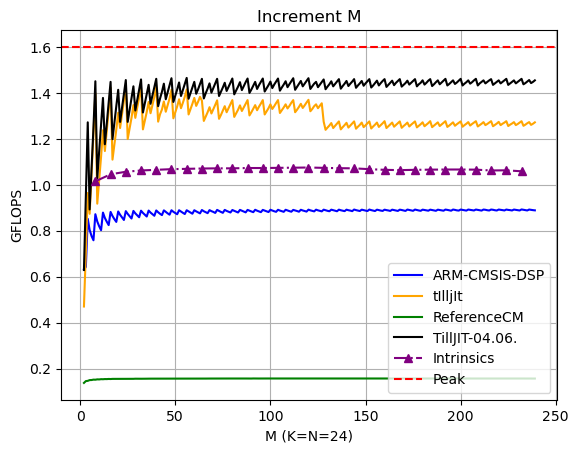

In [19]:
data = pd.read_csv('gemm_growing_m.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    if type_exec == "Intrinsics":
        plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'), linestyle='-.', marker='^')
    else:
        plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('M (K=N=24)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Increment M")
plt.show()

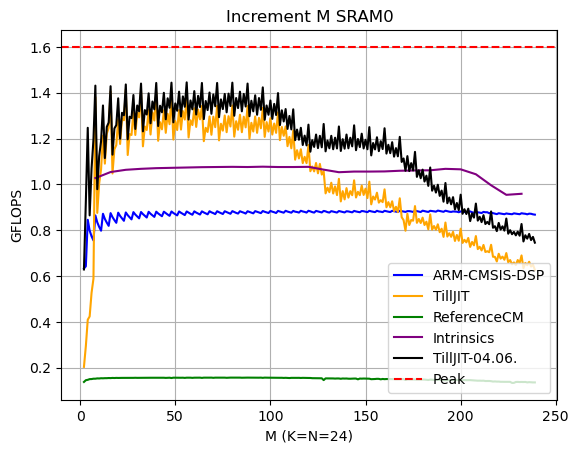

In [20]:
data = pd.read_csv('gemm_growing_m_sram0.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('M (K=N=24)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Increment M SRAM0")
plt.show()

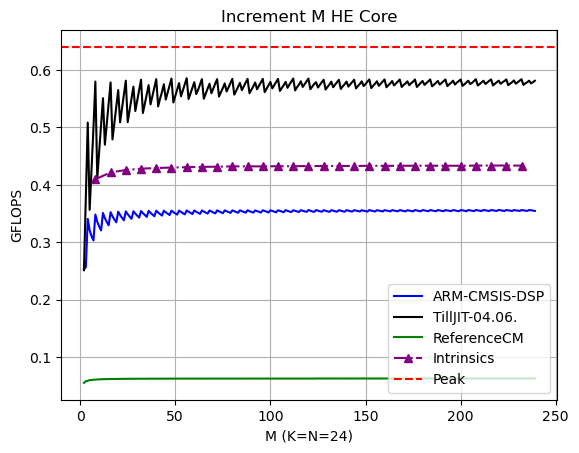

In [37]:
data = pd.read_csv('gemm_growing_m_he.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    if type_exec == "Intrinsics":
        plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'), linestyle='-.', marker='^')
    else:
        plt.plot(subset['M'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=0.64, color='r', linestyle='--', label='Peak')
plt.xlabel('M (K=N=24)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Increment M HE Core")
plt.show()

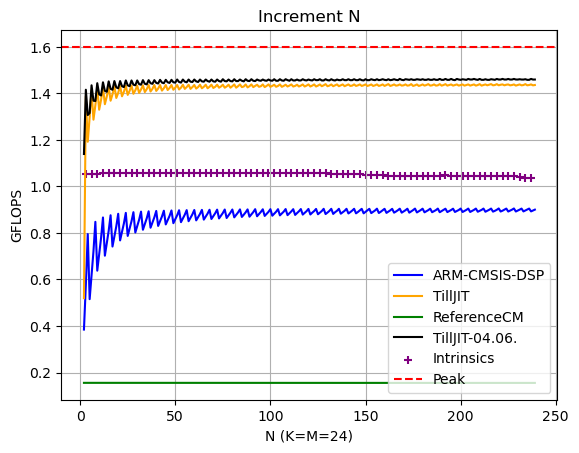

In [21]:
data = pd.read_csv('gemm_growing_n.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    if type_exec == "Intrinsics":
        plt.scatter(subset['N'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'), marker='+')
    else:
        plt.plot(subset['N'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('N (K=M=24)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Increment N")
plt.show()

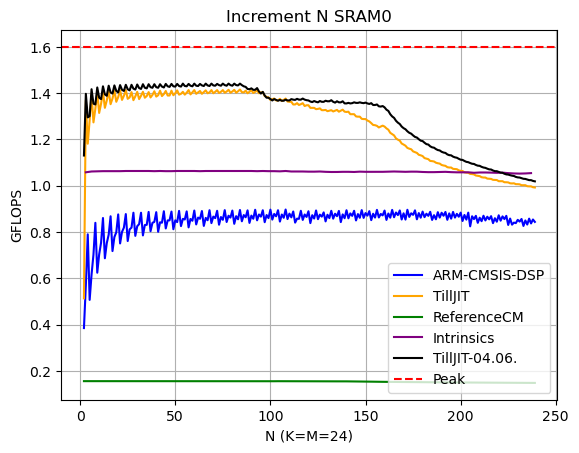

In [22]:
data = pd.read_csv('gemm_growing_n_sram0.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    plt.plot(subset['N'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=1.6, color='r', linestyle='--', label='Peak')
plt.xlabel('N (K=M=24)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Increment N SRAM0")
plt.show()

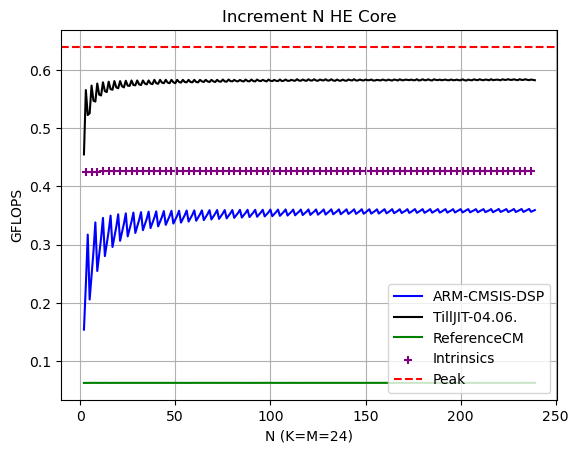

In [31]:
data = pd.read_csv('gemm_growing_n_he.csv', sep=";")
data
#plt.figure(figsize=(10, 6))
for type_exec in data['Type'].unique():
    subset = data[data['Type'] == type_exec]
    if type_exec == "Intrinsics":
        plt.scatter(subset['N'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'), marker='+')
    else:
        plt.plot(subset['N'], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))

plt.axhline(y=0.64, color='r', linestyle='--', label='Peak')
plt.xlabel('N (K=M=24)')
plt.ylabel('GFLOPS')
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Increment N HE Core")
plt.show()

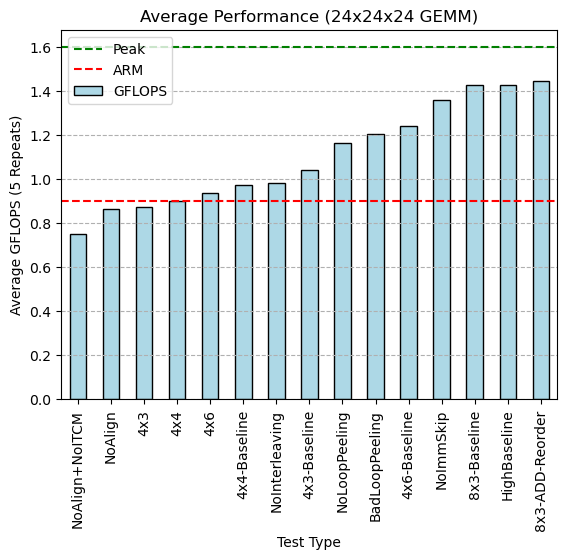

In [23]:
data = pd.read_csv('ablation.csv', sep=";")

# Calculate the average GFLOPS for each test type
average_gflops = data.groupby('Test')['GFLOPS'].mean()

# Create the bar plot
#plt.figure(figsize=(6, 6))
average_gflops = data.groupby('Test')['GFLOPS'].mean().sort_values(ascending=True)
average_gflops.plot(kind='bar', color='lightblue', edgecolor='black')

# Add labels and title
plt.xlabel('Test Type')
plt.ylabel('Average GFLOPS (5 Repeats)')
plt.title('Average Performance (24x24x24 GEMM)')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.axhline(y=1.6, color='g', linestyle='--', label='Peak')
plt.axhline(y=0.9, color='r', linestyle='--', label='ARM')
plt.legend()
# Show the plot
plt.show()

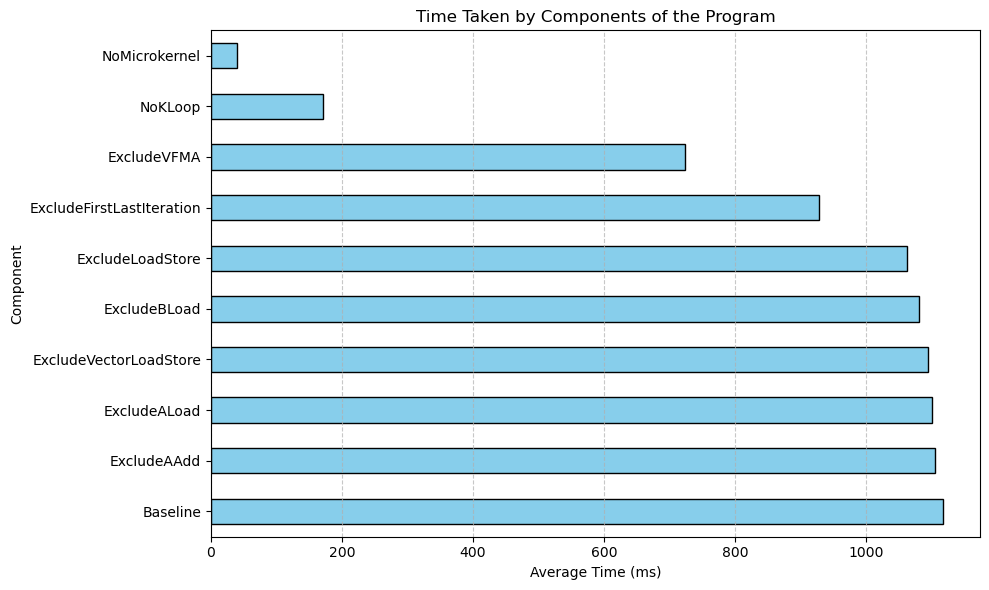

In [24]:
# Load the data
data = pd.read_csv('components_exclude.csv', sep=";")
data['Time'] = data['Time'].abs()
# Group by 'Test' and calculate the average time for each component
average_time = data.groupby('Test')['Time'].mean().sort_values(ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
average_time.plot(kind='barh', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Average Time (ms)')
plt.ylabel('Component')
plt.title('Time Taken by Components of the Program')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

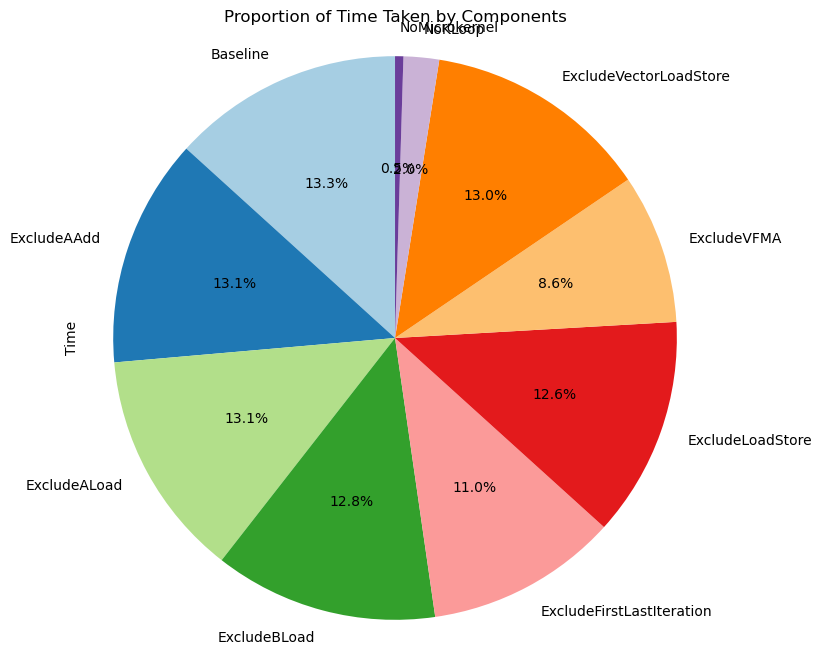

In [25]:
data = pd.read_csv('components_exclude.csv', sep=";")

# Take the absolute value of the 'Time' column
data['Time'] = data['Time'].abs()

# Group by 'Test' and calculate the total time for each component
total_time = data.groupby('Test')['Time'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
total_time.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Proportion of Time Taken by Components')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

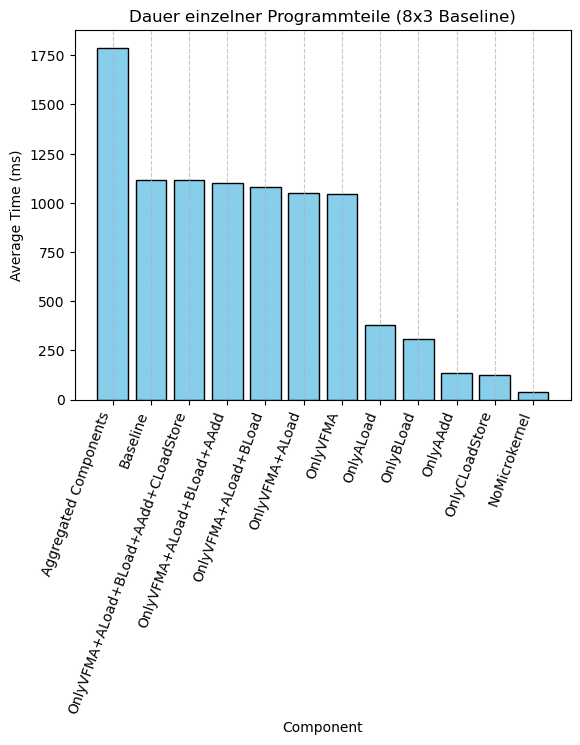

In [26]:
# Load the data
data = pd.read_csv('components_include_additive.csv', sep=";")
data['Time'] = data['Time'].abs()

average_time = data.groupby('Test')['Time'].mean().reset_index()
nomicrokernel_time = data[data['Test'] == 'NoMicrokernel']['Time'].mean()
aggregated_value = average_time[average_time['Test'].isin(['NoMicrokernel', 'OnlyCLoadStore', 'OnlyAAdd', 'OnlyBLoad', 'OnlyALoad', 'OnlyVFMA'])]['Time'].sum()
aggregated_value -= 6 * nomicrokernel_time

# Add the aggregated value as a new row using pd.concat
aggregated_row = pd.DataFrame({'Test': ['Aggregated Components'], 'Time': [aggregated_value]})
aggregated_data = pd.concat([average_time, aggregated_row], ignore_index=True)
aggregated_data = aggregated_data.sort_values(by='Time', ascending=False)


# Create a horizontal bar plot
plt.bar(aggregated_data['Test'], aggregated_data['Time'], color='skyblue', edgecolor='black')

# Add labels and title
plt.ylabel('Average Time (ms)')
plt.xlabel('Component')
plt.title('Dauer einzelner Programmteile (8x3 Baseline)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=70, ha='right')

# Show the plot
plt.show()

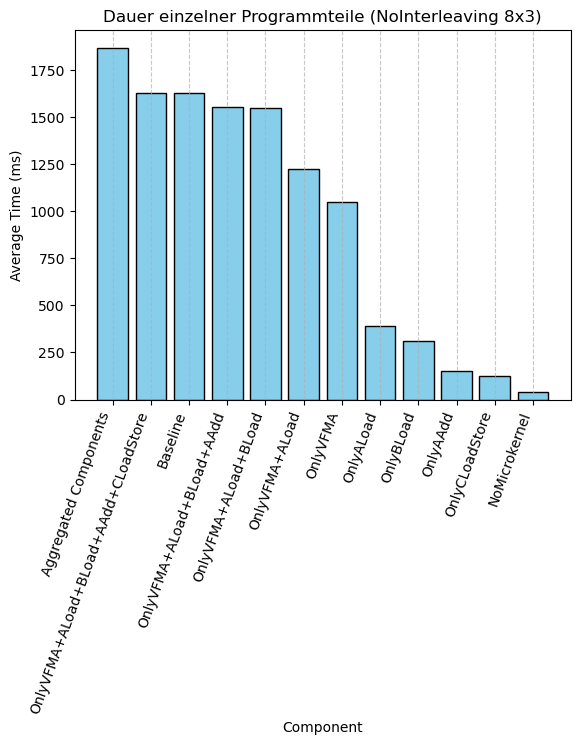

In [27]:
# Load the data
data = pd.read_csv('components_include_additive_slow.csv', sep=";")
data['Time'] = data['Time'].abs()

average_time = data.groupby('Test')['Time'].mean().reset_index()
nomicrokernel_time = data[data['Test'] == 'NoMicrokernel']['Time'].mean()
aggregated_value = average_time[average_time['Test'].isin(['NoMicrokernel', 'OnlyCLoadStore', 'OnlyAAdd', 'OnlyBLoad', 'OnlyALoad', 'OnlyVFMA'])]['Time'].sum()
aggregated_value -= 5 * nomicrokernel_time

# Add the aggregated value as a new row using pd.concat
aggregated_row = pd.DataFrame({'Test': ['Aggregated Components'], 'Time': [aggregated_value]})
aggregated_data = pd.concat([average_time, aggregated_row], ignore_index=True)
aggregated_data = aggregated_data.sort_values(by='Time', ascending=False)

# Create a horizontal bar plot
plt.bar(aggregated_data['Test'], aggregated_data['Time'], color='skyblue', edgecolor='black')

# Add labels and title
plt.ylabel('Average Time (ms)')
plt.xlabel('Component')
plt.title('Dauer einzelner Programmteile (NoInterleaving 8x3)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=70, ha='right')

# Show the plot
plt.show()

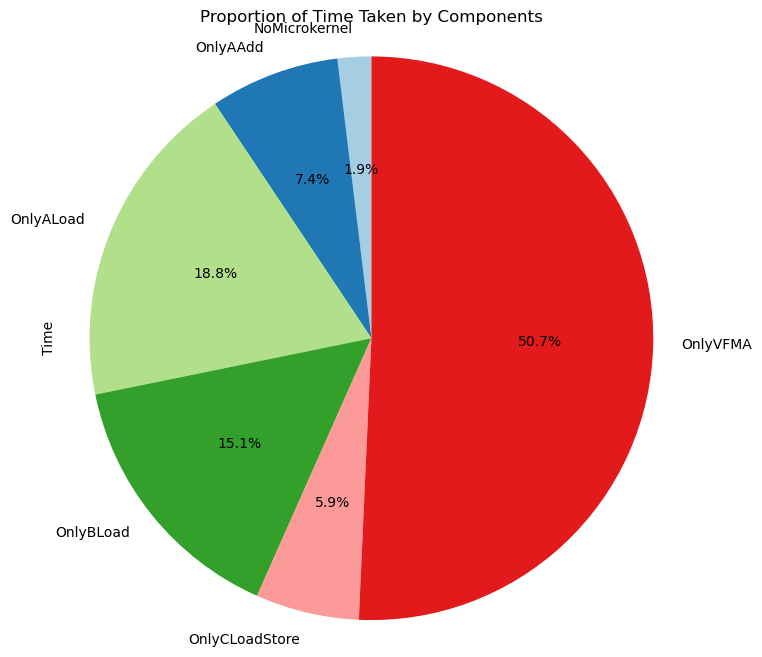

In [28]:
data = pd.read_csv('components_include_additive_slow.csv', sep=";")

# Take the absolute value of the 'Time' column
data['Time'] = data['Time'].abs()

# Group by 'Test' and calculate the total time for each component
total_time = data[data['Test'].isin(['NoMicrokernel', 'OnlyCLoadStore', 'OnlyAAdd', 'OnlyBLoad', 'OnlyALoad', 'OnlyVFMA'])].groupby('Test')['Time'].mean()

# Create the pie chart
plt.figure(figsize=(8, 8))
total_time.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Proportion of Time Taken by Components')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()